In [1]:
import pandas as pd
import numpy as np

# USING IMPORT EMAILS TO PARSE THORUGH MESSAGES
import email
from email.parser import Parser

import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
from time import strftime
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Intensity Score (sentiment score)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Polarity / Subjectivity scores
from textblob import TextBlob

In [3]:
df = pd.read_csv('01-clean_data.csv', index_col=False)

df.head()

,Unnamed: 0,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,0,allen-p/_sent_mail/1.,NaN,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,3,allen-p/_sent_mail/1000.,NaN,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

df.head(2)

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,NaN,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True


In [95]:
df[['content', 'date', 'sender', 'subject']].head()

,content,date,sender,subject
0,Here is our forecast\n\n,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN
1,Traveling to have a business meeting takes the...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:
2,test successful. way to go!!!,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test
3,"Randy,\n\n Can you send me a schedule of the s...","Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN
4,Let's shoot for Tuesday at 11:45.,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello


In [5]:
df.to_csv('01-clean_data.csv', index = False)

In [6]:
df.shape

(517401, 14)

In [21]:
df.drop(columns = ['clean', 'tokenize', 'stop_words']).head()

,file,subject,sender,date,content,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,NaN,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,NaN,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


# you can see what is going with nulls here
- If content column is special character, clean function will make in a Nan
- if cleaned content is an empty string, tokenize function will make it a Nan
- if tokenized content only contains a stop word, lemmatized function will make it a Nan

In [7]:
df.head()

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
0,allen-p/_sent_mail/1.,NaN,phillip.allen@enron.com,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,here is our forecast,here is our forecast,forecast,forecast,0.0000,0.00,0.000000,False,True
1,allen-p/_sent_mail/10.,Re:,phillip.allen@enron.com,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,allen-p/_sent_mail/100.,Re: test,phillip.allen@enron.com,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859,0.75,0.950000,False,True
3,allen-p/_sent_mail/1000.,NaN,phillip.allen@enron.com,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy can you send me a schedule of the sala...,randy can you send me a schedule of the salary...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,allen-p/_sent_mail/1001.,Re: Hello,phillip.allen@enron.com,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [8]:
df.isna().sum()

file                0
subject         19187
sender              0
date                0
content             0
clean              45
tokenize           54
stop_words        287
lemmatize         287
intensity           0
polarity            0
subjectivity        0
is_poi              0
is_internal         0
dtype: int64

In [19]:
df[(df.stop_words.isna() == True) &(df.tokenize.isna() == False)]

,file,subject,sender,date,content,clean,tokenize,stop_words,lemmatize,intensity,polarity,subjectivity,is_poi,is_internal
160,allen-p/_sent_mail/239.,Re:,phillip.allen@enron.com,"Mon, 26 Jun 2000 07:13:00 -0700 (PDT)",no,no,no,NaN,NaN,0.0,0.0,0.0,False,True
753,allen-p/all_documents/238.,Re:,phillip.allen@enron.com,"Mon, 26 Jun 2000 07:13:00 -0700 (PDT)",no,no,no,NaN,NaN,0.0,0.0,0.0,False,True
2567,allen-p/sent/192.,Re:,phillip.allen@enron.com,"Mon, 26 Jun 2000 07:13:00 -0700 (PDT)",no,no,no,NaN,NaN,0.0,0.0,0.0,False,True
6457,arnold-j/sent_items/188.,NaN,john.arnold@enron.com,"Fri, 15 Jun 2001 07:40:16 -0700 (PDT)",here she is...\n,here she is,here she is,NaN,NaN,0.0,0.0,0.0,False,True
6817,arnold-j/sent_items/517.,NaN,john.arnold@enron.com,"Tue, 9 Oct 2001 08:33:52 -0700 (PDT)",are you there?,are you there,are you there,NaN,NaN,0.0,0.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508959,williams-j/sent_items/96.,NaN,trading <.williams@enron.com>,"Mon, 4 Jun 2001 09:56:37 -0700 (PDT)",Here it is:\n\n\n,here it is,here it is,NaN,NaN,0.0,0.0,0.0,False,True
516391,zipper-a/sent_items/108.,Cargill,andy.zipper@enron.com,"Fri, 1 Jun 2001 07:53:22 -0700 (PDT)",where are we at with them ?,where are we at with them,where are we at with them,NaN,NaN,0.0,0.0,0.0,False,True
516545,zipper-a/sent_items/249.,RE: ERcot vols,andy.zipper@enron.com,"Tue, 9 Oct 2001 05:50:48 -0700 (PDT)",where are they ?\n,where are they,where are they,NaN,NaN,0.0,0.0,0.0,False,True
516668,zipper-a/sent_items/44.,RE: a test message,andy.zipper@enron.com,"Fri, 28 Dec 2001 09:25:30 -0800 (PST)",who are you ?,who are you,who are you,NaN,NaN,0.0,0.0,0.0,False,True


In [15]:
print(df.tokenize[151719])

In [16]:
df.clean[151719]

'    '

In [22]:
ts = pd.read_csv('02-ts_data.csv')

ts.shape

(517401, 6)

In [23]:
ts.head()

,date,intensity,polarity,subjectivity,year,month
0,1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1,1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
2,1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
3,1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
4,1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [24]:
ts.isna().sum()

date            0
intensity       0
polarity        0
subjectivity    0
year            0
month           0
dtype: int64

<AxesSubplot:>

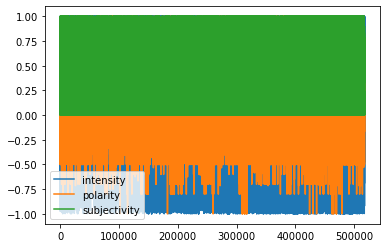

In [26]:
ts.drop(columns = ['month', 'year']).plot()

In [29]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          517401 non-null  object 
 1   intensity     517401 non-null  float64
 2   polarity      517401 non-null  float64
 3   subjectivity  517401 non-null  float64
 4   year          517401 non-null  int64  
 5   month         517401 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 23.7+ MB


In [35]:
ts.date.head(2)

0    1980-01-01 00:00:00+00:00
1    1980-01-01 00:00:00+00:00
Name: date, dtype: object

In [36]:
ts.date = pd.to_datetime(ts.date)

In [39]:
ts.set_index('date', inplace = True)

<AxesSubplot:xlabel='date'>

<Figure size 720x720 with 0 Axes>

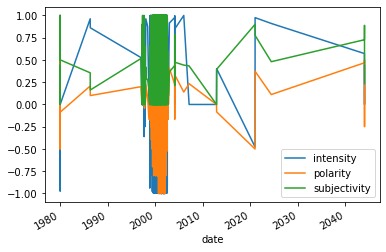

<Figure size 720x720 with 0 Axes>

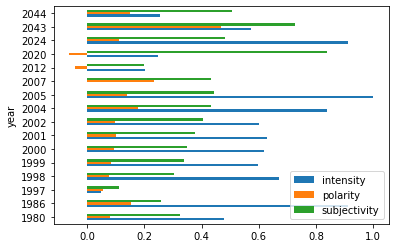

In [49]:
plt.figure(figsize = (10, 10))
ts.groupby('year')[['intensity', 'polarity', 'subjectivity']].mean().plot.barh()
plt.show()

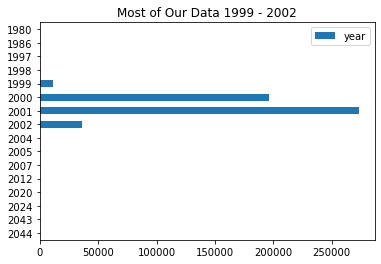

In [74]:
pd.DataFrame(ts.year.value_counts()).sort_index(ascending = False).plot.barh()
plt.title('Most of Our Data 1999 - 2002')
plt.show()

In [85]:
pd.DataFrame(round(ts.year.value_counts(normalize = True)*100, 4)).sort_index()

,year
1980,0.1009
1986,0.0004
1997,0.0845
1998,0.0342
1999,2.1538
2000,37.9010
2001,52.7568
2002,6.9528
2004,0.0135
2005,0.0002


<AxesSubplot:>

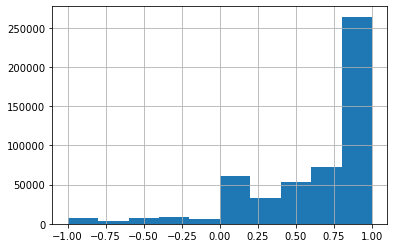

In [86]:
ts.intensity.hist()

In [87]:
ts.head()

,intensity,polarity,subjectivity,year,month
date,,,,,
1980-01-01 00:00:00+00:00,0.6124,-0.104861,0.431250,1980,1
1980-01-01 00:00:00+00:00,0.0000,0.000000,0.000000,1980,1
1980-01-01 00:00:00+00:00,0.9943,0.278879,0.575575,1980,1
1980-01-01 00:00:00+00:00,0.6908,0.008333,0.633333,1980,1
1980-01-01 00:00:00+00:00,0.7184,0.043810,0.373810,1980,1


In [94]:
pd.to_datetime(df.date).head().ts.year

AttributeError: 'Series' object has no attribute 'ts'